# Objetivo do Notebook 

Este notebook tem como objetivo extrair informações relevantes sobre a Pandemia de Covid-19 no Brasil, afim de nos possibilitar a compreender melhor o atual período.

Para a Análise desse DataSet foram adotados os seguintes critérios:

 - **0.1** - Média Móvel : Média de Casos e Óbitos nos ultimos 7 dias

 - **0.2** - Variação de Casos e Óbitos : Variação percentual da Média móvel nos ultimos 14 dias

<hr> </hr>
 
 - **- Objetivos do Notebook**:
 
 - **1** - Obter o número total de Casos e Mortes Confirmadas por covid-19 no Brasil 

 - **2** - Obter o número total de casos e Óbitos confirmados para cada Unidade Federativa Brasileira 

 - **3** - Evolução Diária da Pandemia sobre o Brasil 

 - **4** - Filtrar os dias com os maiores indíces de casos e Óbitos confirmados por Covid-19 no Brasil 

 - **5** - Filtrar os meses com os maiores indíces de casos e Óbitos confirmados por Covid-19 no Brasil 

 - **6** - Calcular a  Média Móvel de Casos e Óbitos por Covid-19 

 - **7** - Calcular a variação percentual de Casos e Óbitos da Pandemia no Brasil 

 - **8** - Plotar os gráficos das regiões mapeadas com os maiores índices de casos e óbitos

In [396]:
import datetime
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import json
import folium 
from folium import plugins
from IPython.core.display import display
from IPython.display import Image

In [397]:
# Aumenta a largura da célula do notebook Jupyter 
display(HTML("<style>.container { width:70% !important; }</style>"))

In [398]:
covid = pd.read_csv('covid.csv.gz', index_col='date', parse_dates=True)
covid.head()

,city,city_ibge_code,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
date,,,,,,,,,,,,,,,,,
2020-03-17,Rio Branco,1200401.0,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-17,0.0,0,1,city,AC,3,0
2020-03-17,NaN,12.0,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-17,0.0,0,1,state,AC,3,0
2020-03-18,Rio Branco,1200401.0,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-18,0.0,0,2,city,AC,0,0
2020-03-18,NaN,12.0,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-18,0.0,0,2,state,AC,0,0
2020-03-19,Rio Branco,1200401.0,202012,413418.0,407319.0,False,False,4,0.96754,2020-03-19,0.0,0,3,city,AC,1,0


In [399]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1809424 entries, 2020-03-17 to 2021-03-28
Data columns (total 17 columns):
 #   Column                                         Dtype  
---  ------                                         -----  
 0   city                                           object 
 1   city_ibge_code                                 float64
 2   epidemiological_week                           int64  
 3   estimated_population                           float64
 4   estimated_population_2019                      float64
 5   is_last                                        bool   
 6   is_repeated                                    bool   
 7   last_available_confirmed                       int64  
 8   last_available_confirmed_per_100k_inhabitants  float64
 9   last_available_date                            object 
 10  last_available_death_rate                      float64
 11  last_available_deaths                          int64  
 12  order_for_place            

In [400]:
covid.describe()

,city_ibge_code,epidemiological_week,estimated_population,estimated_population_2019,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_death_rate,last_available_deaths,order_for_place,new_confirmed,new_deaths
count,1.802694e+06,1.809424e+06,1.802694e+06,1.802694e+06,1.809424e+06,1.787175e+06,1.809424e+06,1.809424e+06,1.809424e+06,1.809424e+06,1.809424e+06
mean,3.217500e+06,2.020548e+05,8.737765e+04,8.670935e+04,1.934190e+03,2.167030e+03,2.958883e-02,5.318889e+01,1.629909e+02,1.377501e+01,3.426986e-01
std,1.011109e+06,3.224507e+01,9.515769e+05,9.447003e+05,2.398576e+04,2.334271e+03,7.053377e-02,7.470391e+02,9.531780e+01,1.912054e+02,5.339020e+00
min,1.100000e+01,2.020090e+05,7.760000e+02,7.810000e+02,0.000000e+00,2.160000e-03,0.000000e+00,0.000000e+00,1.000000e+00,-1.391500e+04,-1.870000e+02
25%,2.507408e+06,2.020310e+05,5.781000e+03,5.770000e+03,3.600000e+01,4.348399e+02,3.700000e-03,1.000000e+00,8.100000e+01,0.000000e+00,0.000000e+00
50%,3.143203e+06,2.020430e+05,1.260800e+04,1.257100e+04,1.530000e+02,1.474057e+03,1.700000e-02,3.000000e+00,1.620000e+02,0.000000e+00,0.000000e+00
75%,4.115853e+06,2.021010e+05,2.794100e+04,2.777600e+04,5.250000e+02,3.121552e+03,3.120000e-02,1.100000e+01,2.420000e+02,3.000000e+00,0.000000e+00
max,5.300108e+06,2.021130e+05,4.628933e+07,4.591905e+07,2.420100e+06,3.442914e+04,1.000000e+00,7.199100e+04,3.980000e+02,4.502000e+04,1.193000e+03


In [401]:
covid_estados = covid[covid.place_type == 'state']
covid_estados.head()

,city,city_ibge_code,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
date,,,,,,,,,,,,,,,,,
2020-03-17,NaN,12.0,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-17,0.0,0,1,state,AC,3,0
2020-03-18,NaN,12.0,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-18,0.0,0,2,state,AC,0,0
2020-03-19,NaN,12.0,202012,894470.0,881935.0,False,False,4,0.44719,2020-03-19,0.0,0,3,state,AC,1,0
2020-03-20,NaN,12.0,202012,894470.0,881935.0,False,False,7,0.78259,2020-03-20,0.0,0,4,state,AC,3,0
2020-03-21,NaN,12.0,202012,894470.0,881935.0,False,False,11,1.22978,2020-03-21,0.0,0,5,state,AC,4,0


In [402]:
covid_estados.isna().sum()

city                                             10291
city_ibge_code                                       0
epidemiological_week                                 0
estimated_population                                 0
estimated_population_2019                            0
is_last                                              0
is_repeated                                          0
last_available_confirmed                             0
last_available_confirmed_per_100k_inhabitants        6
last_available_date                                  0
last_available_death_rate                            0
last_available_deaths                                0
order_for_place                                      0
place_type                                           0
state                                                0
new_confirmed                                        0
new_deaths                                           0
dtype: int64

In [403]:
casos_total = covid_estados.new_confirmed.sum()
obitos_total = covid_estados.new_deaths.sum()
print(f'Total de Casos confirmados de Covid-19 no Brasil até {covid.index[-1]}: {casos_total}')
print(f'Total de Mortes confirmadas por Covid-19 no Brasil até {covid.index[-1]}: {obitos_total}')

Total de Casos confirmados de Covid-19 no Brasil até 2021-03-28 00:00:00: 12542214
Total de Mortes confirmadas por Covid-19 no Brasil até 2021-03-28 00:00:00: 312432


# Casos confirmados de covid-19 por Estado

In [405]:
casos_por_estados = covid_estados.groupby('state')['new_confirmed'].sum()
casos_por_estados = casos_por_estados.sort_values(ascending=False)
casos_por_estados = pd.DataFrame(casos_por_estados)
casos_por_estados

,new_confirmed
state,
SP,2420100
MG,1100575
PR,836936
RS,830630
SC,795391
BA,794437
RJ,640467
CE,527185
GO,475463


# Óbitos confirmados de covid-19 por estado

In [406]:
obitos_por_estados = covid_estados.groupby('state')['new_deaths'].sum()
obitos_por_estados = obitos_por_estados.sort_values(ascending=False)
obitos_por_estados = pd.DataFrame(obitos_por_estados)
obitos_por_estados

,new_deaths
state,
SP,71991
RJ,36109
MG,23687
RS,18823
PR,16190
BA,14960
CE,13596
PE,12006
AM,11952


# Evolução Diaria da Pandemia

In [407]:
evolucao_diaria = covid_estados.groupby(covid_estados.index)[['new_confirmed', 'new_deaths']].sum()
evolucao_diaria

,new_confirmed,new_deaths
date,,
2020-02-25,1,0
2020-02-26,0,0
2020-02-27,0,0
2020-02-28,1,0
2020-02-29,0,0
...,...,...
2021-03-24,90424,2307
2021-03-25,98839,2664
2021-03-26,80324,3500


# Variação de Casos Confirmados na Pandemia 

In [408]:
evolucao_diaria['variation_cases'] = evolucao_diaria.new_confirmed.rolling(window=15).mean().pct_change() * 100
evolucao_diaria.tail()

,new_confirmed,new_deaths,variation_cases
date,,,
2021-03-24,90424,2307,1.767083
2021-03-25,98839,2664,1.576829
2021-03-26,80324,3500,0.290686
2021-03-27,81703,3407,-0.068429
2021-03-28,43583,1481,-2.386315


# Variação de Óbitos confirmados na Pandemia

In [409]:
evolucao_diaria['variation_deaths'] = evolucao_diaria.new_deaths.rolling(window=15).mean().pct_change() * 100
evolucao_diaria.tail()

,new_confirmed,new_deaths,variation_cases,variation_deaths
date,,,,
2021-03-24,90424,2307,1.767083,1.103226
2021-03-25,98839,2664,1.576829,0.867433
2021-03-26,80324,3500,0.290686,3.965601
2021-03-27,81703,3407,-0.068429,3.755882
2021-03-28,43583,1481,-2.386315,-1.346555


# Média Móvel de Casos e Óbitos 

In [410]:
evolucao_diaria['moving_average_cases'] = evolucao_diaria.new_confirmed.rolling(window=8).mean()
evolucao_diaria['moving_average_deaths'] = evolucao_diaria.new_deaths.rolling(window=8).mean()
evolucao_diaria.tail()

,new_confirmed,new_deaths,variation_cases,variation_deaths,moving_average_cases,moving_average_deaths
date,,,,,,
2021-03-24,90424,2307,1.767083,1.103226,77117.875,2339.125
2021-03-25,98839,2664,1.576829,0.867433,78391.125,2339.500
2021-03-26,80324,3500,0.290686,3.965601,77440.875,2436.500
2021-03-27,81703,3407,-0.068429,3.755882,76621.375,2530.375
2021-03-28,43583,1481,-2.386315,-1.346555,72925.000,2419.500


In [411]:
evolucao_diaria = evolucao_diaria.replace([np.inf, -np.inf], np.nan)
evolucao_diaria = evolucao_diaria.fillna(value=0)
evolucao_diaria.tail()

,new_confirmed,new_deaths,variation_cases,variation_deaths,moving_average_cases,moving_average_deaths
date,,,,,,
2021-03-24,90424,2307,1.767083,1.103226,77117.875,2339.125
2021-03-25,98839,2664,1.576829,0.867433,78391.125,2339.500
2021-03-26,80324,3500,0.290686,3.965601,77440.875,2436.500
2021-03-27,81703,3407,-0.068429,3.755882,76621.375,2530.375
2021-03-28,43583,1481,-2.386315,-1.346555,72925.000,2419.500


## Dias e Meses com os maiores índices de Casos e Óbitos por covid-19

In [419]:
dia_com_mais_casos = evolucao_diaria.nlargest(len(evolucao_diaria), 'new_confirmed')
dia_com_mais_casos.head(10)

,new_confirmed,new_deaths,variation_cases,variation_deaths,moving_average_cases,moving_average_deaths
date,,,,,,
2021-03-25,98839,2664,1.576829,0.867433,78391.125,2339.500
2021-03-24,90424,2307,1.767083,1.103226,77117.875,2339.125
2021-01-07,89769,1517,7.966997,5.134406,42943.625,827.750
2021-03-17,88653,2661,2.832597,3.525485,71676.875,2071.625
2021-03-19,88259,2656,1.147576,2.981144,73882.750,2172.125
2021-03-18,87926,2724,1.429459,3.173568,72484.250,2114.500
2021-03-16,85644,2850,4.631917,8.201445,69507.000,1982.875
2021-03-23,85112,3147,4.692916,6.695543,76520.375,2407.000
2021-03-12,82471,2122,1.492764,2.364046,71247.625,1759.125


In [422]:
dia_com_mais_obitos = evolucao_diaria.nlargest(len(evolucao_diaria), 'new_deaths')
dia_com_mais_obitos.head(10)

,new_confirmed,new_deaths,variation_cases,variation_deaths,moving_average_cases,moving_average_deaths
date,,,,,,
2021-03-26,80324,3500,0.290686,3.965601,77440.875,2436.500
2021-03-27,81703,3407,-0.068429,3.755882,76621.375,2530.375
2021-03-23,85112,3147,4.692916,6.695543,76520.375,2407.000
2021-03-16,85644,2850,4.631917,8.201445,69507.000,1982.875
2021-03-18,87926,2724,1.429459,3.173568,72484.250,2114.500
2021-03-25,98839,2664,1.576829,0.867433,78391.125,2339.500
2021-03-17,88653,2661,2.832597,3.525485,71676.875,2071.625
2021-03-19,88259,2656,1.147576,2.981144,73882.750,2172.125
2021-03-10,81467,2381,1.921645,4.797411,69919.875,1676.375


In [372]:
mes_com_mais_casos = evolucao_diaria.reset_index()
mes_com_mais_casos['date'] = pd.to_datetime(mes_com_mais_casos['date']).dt.to_period('M')
mes_com_mais_casos = mes_com_mais_casos.groupby('date')[['new_confirmed']].sum()
mes_com_mais_casos = mes_com_mais_casos.sort_values(by='new_confirmed', ascending=False)
mes_com_mais_casos.index = mes_com_mais_casos.index.astype('datetime64[ns]')
mes_com_mais_casos

,new_confirmed
date,
2021-03-01,1984126
2021-01-01,1527489
2021-02-01,1349567
2020-12-01,1339067
2020-07-01,1257787
2020-08-01,1244378
2020-09-01,902536
2020-06-01,896570
2020-11-01,804202


In [373]:
mes_com_mais_obitos = evolucao_diaria.reset_index()
mes_com_mais_obitos['date'] = pd.to_datetime(mes_com_mais_obitos['date']).dt.to_period('M')
mes_com_mais_obitos = mes_com_mais_obitos.groupby('date')[['new_deaths']].sum()
mes_com_mais_obitos = mes_com_mais_obitos.sort_values(by='new_deaths', ascending=False)
mes_com_mais_obitos.index = mes_com_mais_obitos.index.astype('datetime64[ns]')
mes_com_mais_obitos

,new_deaths
date,
2021-03-01,57257
2020-07-01,32936
2021-02-01,30529
2020-06-01,30424
2021-01-01,29574
2020-08-01,28891
2020-05-01,23387
2020-09-01,22346
2020-12-01,21804


# Data Visualization

Text(0, 0.5, 'Casos  Confirmados')

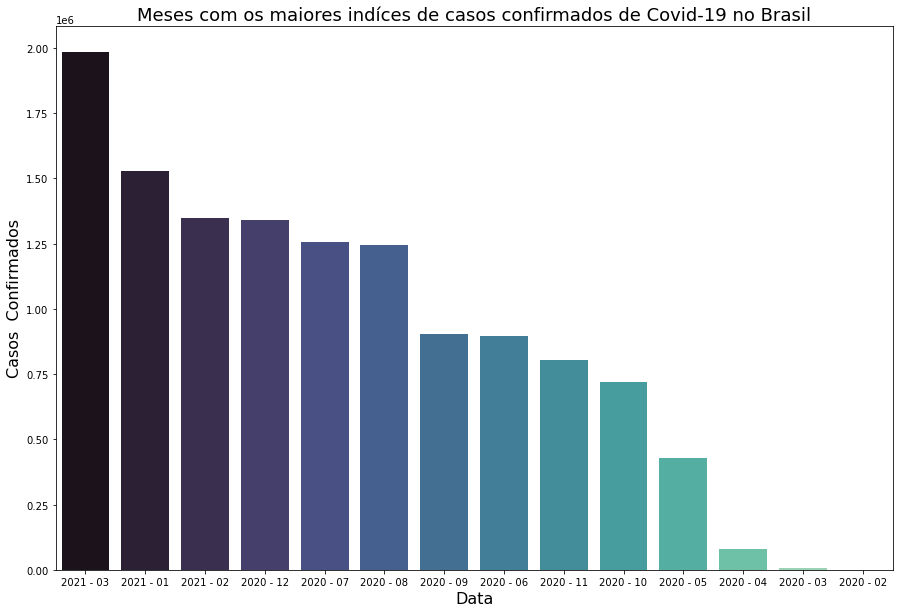

In [374]:
fig = plt.figure(figsize=(15, 10))
sns.barplot(x=mes_com_mais_casos.index.strftime('%Y - %m'), y=mes_com_mais_casos.new_confirmed, data=mes_com_mais_casos, palette="mako")
plt.title('Meses com os maiores indíces de casos confirmados de Covid-19 no Brasil', fontsize=18)
plt.xlabel('Data', fontsize=16)
plt.ylabel('Casos  Confirmados', fontsize=16)

Neste gráfico de barras podemos perceber os meses com os maiores indíces de casos confirmados por covid-19 no Brasil.

Text(0, 0.5, 'Obitos Confirmados')

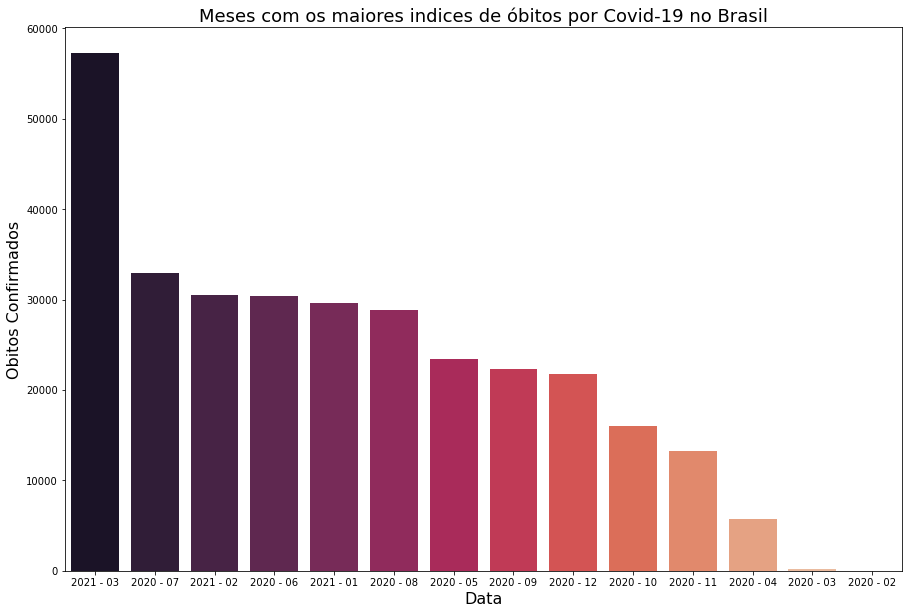

In [320]:
fig = plt.figure(figsize=(15, 10))
sns.barplot(x=mes_com_mais_obitos.index.strftime('%Y - %m'), y=mes_com_mais_obitos.new_deaths, data=mes_com_mais_obitos, palette='rocket')
plt.title('Meses com os maiores indices de óbitos por Covid-19 no Brasil', fontsize=18)
plt.xlabel('Data', fontsize=16)
plt.ylabel('Obitos Confirmados', fontsize=16)

Já neste podemos observar os meses com os maiores indíces de óbitos confirmados por covid-19 no Brasil.

Text(0.5, 1.0, 'Casos Confirmados x Média Móvel de Casos Confirmados por Covid-19 no Brasil')

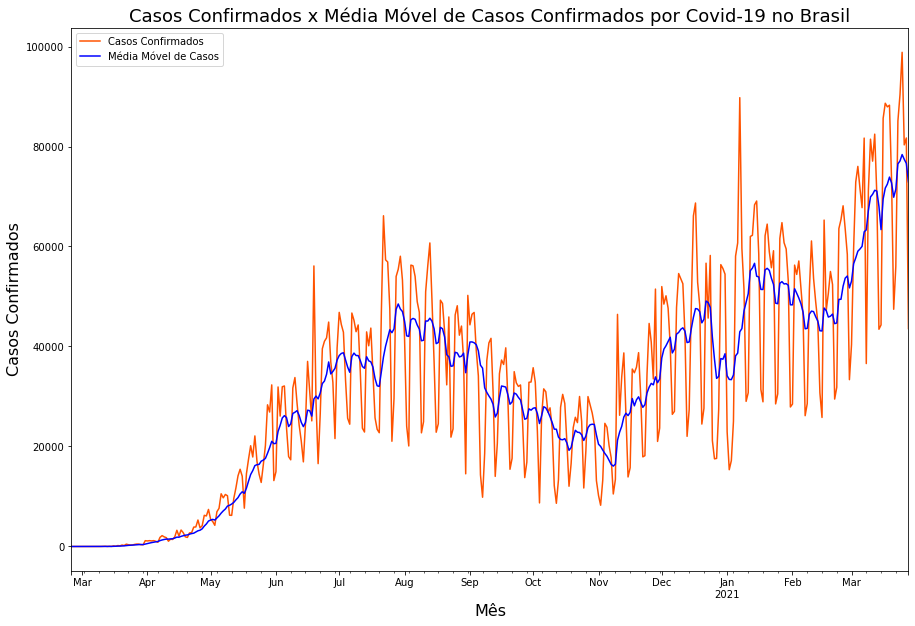

In [385]:
fig = plt.figure(figsize=(15, 10))
evolucao_diaria.new_confirmed.plot(kind="line", color='#ff5300')
evolucao_diaria.moving_average_cases.plot(kind='line', color='b')
plt.xlabel('Mês', fontsize=16)
plt.ylabel('Casos Confirmados', fontsize=16)
plt.legend(['Casos Confirmados', 'Média Móvel de Casos'], loc='best')
plt.title('Casos Confirmados x Média Móvel de Casos Confirmados por Covid-19 no Brasil', fontsize=18)

Text(0.5, 1.0, 'Óbitos confirmados x Média móvel de Obitos confirmados por Covid-19 no Brasil')

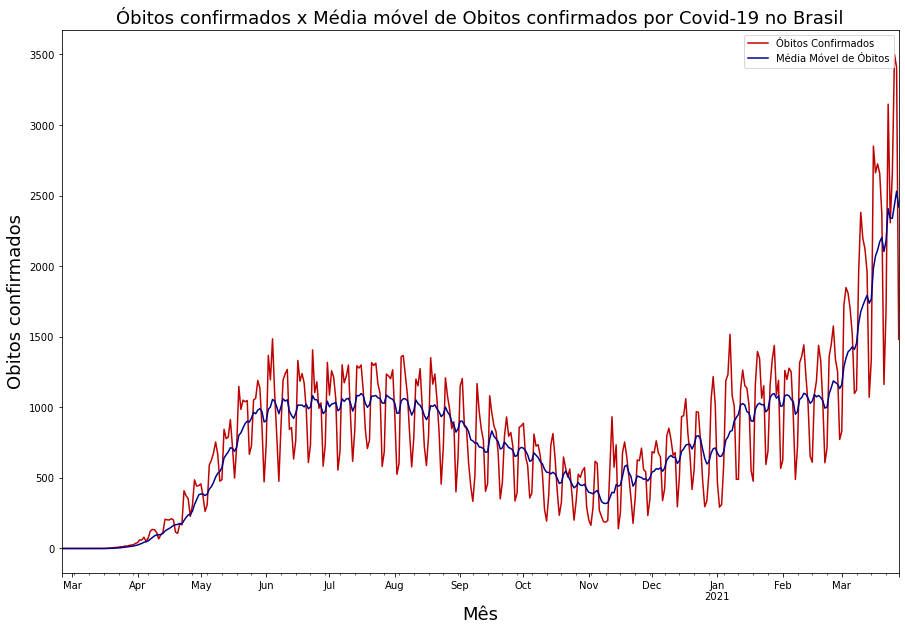

In [386]:
fig = plt.figure(figsize=(15, 10))
evolucao_diaria.new_deaths.plot(kind='line', color='#be0101')
evolucao_diaria.moving_average_deaths.plot(kind='line', color='#00018a')
plt.xlabel('Mês', fontsize=18)
plt.ylabel('Obitos confirmados', fontsize=18)
plt.legend(['Óbitos Confirmados', 'Média Móvel de Óbitos'], loc='best')
plt.title('Óbitos confirmados x Média móvel de Obitos confirmados por Covid-19 no Brasil', fontsize=18)

In [387]:
estados = 'states.json'
geo_json_data = json.load(open(estados))

In [388]:
# Cria um Mapa
mapa1 = folium.Map(width=800,
                  height=600,
                  location=[-15.77972, -47.92972],
                  zoom_start=4)

# Cria um mapa 
mapa2 = folium.Map(width=800,
                  height=600,
                  location=[-15.77972, -47.92972],
                  zoom_start=4)

In [389]:
mapa1.choropleth(
    geo_data = geo_json_data,
    name = 'Casos de Covid-19 por UF',
    data = casos_por_estados,
    columns=[casos_por_estados.index, 'new_confirmed'],
    key_on = 'feature.id',
    fill_color='OrRd',
    fill_opacity=0.8,
    legend_name = 'Casos Confirmados por UF',
    line_color='black',
    line_opacity=0.5,
    show='png')

mapa2.choropleth(
    geo_data = geo_json_data,
    name = 'Obitos de Covid-19 por UF',
    data = obitos_por_estados,
    columns=[obitos_por_estados.index, 'new_deaths'],
    key_on = 'feature.id',
    fill_color='Reds',
    fill_opacity=0.8,
    legend_name = 'Óbitos Confirmados por UF',
    line_color='black',
    line_opacity=0.5,
    show='png')

C:\Users\vinic\Anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


# Mapa com indíces de Casos Confirmados de covid-19 por Estado 

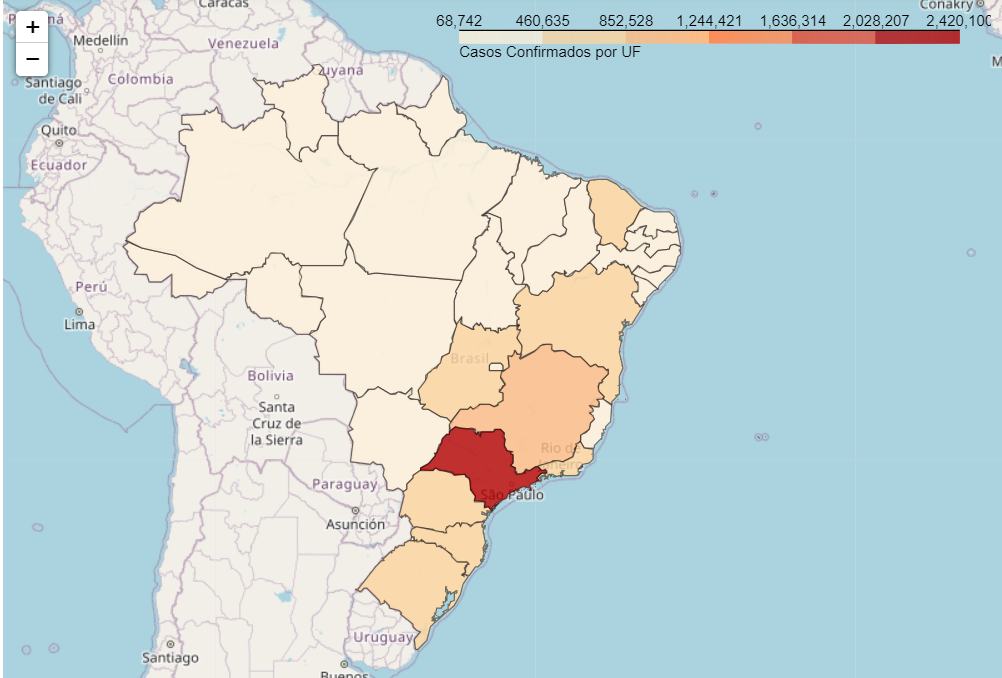

In [347]:
Image(filename='casos_por_estado.png')

# Mapa com indíces de Óbitos confirmados por covid-19 por Estado

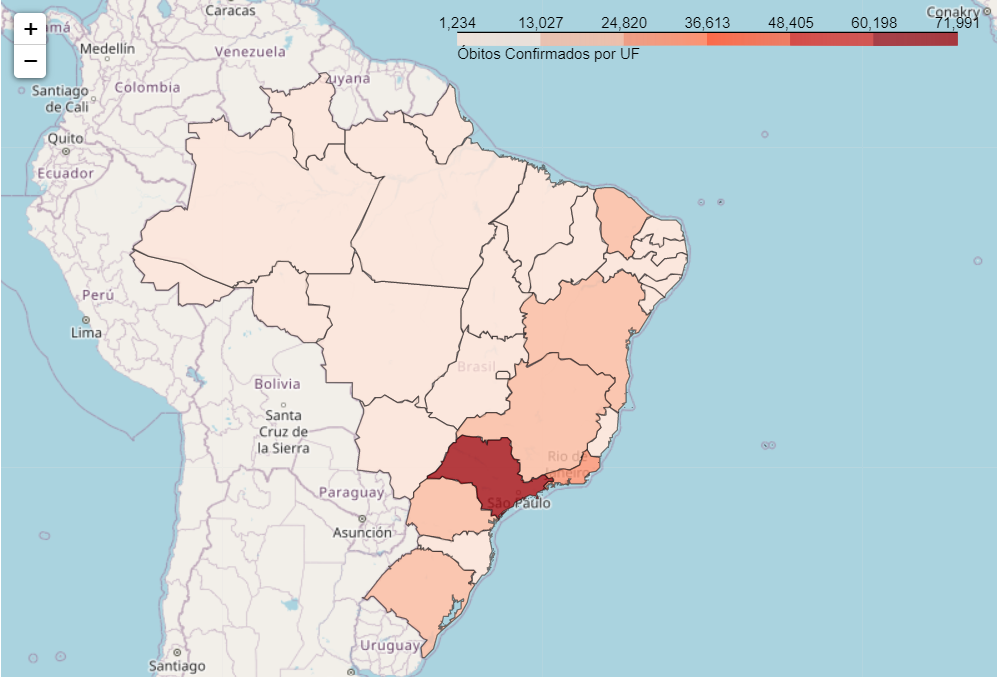

In [391]:
Image(filename='obitos_por_estado.png')

Conclusão: A partir dos dados contidos neste DataSet conseguimos extrair alguns dados e informações importantes sobre a pandemia de covid-19 no Brasil e mapear as datas e as regiões com os maiores indices de casos e obitos na pandemia.